# APS terrain analysis


## Imports

In [4]:
# -*- coding: utf-8 -*-
%matplotlib inline
from __future__ import print_function

import pylab as plt
import datetime
import netCDF4
import numpy as np
import numpy.ma as ma
from linecache import getline

plt.rcParams['figure.figsize'] = (14, 6)

|Id 	|Name|
|---|---|
|3003	|Nordenskiöld Land|
|3007	|Vest-Finnmark|
|3009	|Nord-Troms|
|3010	|Lyngen|
|3011	|Tromsø|
|3012	|Sør-Troms|
|3013	|Indre Troms|
|3014	|Lofoten og Vesterålen|
|3015	|Ofoten|
|3016	|Salten|
|3017	|Svartisen|
|3022	|Trollheimen|
|3023	|Romsdal|
|3024	|Sunnmøre|
|3027	|Indre Fjordane|
|3028	|Jotunheimen|
|3029	|Indre Sogn|
|3031	|Voss|
|3032	|Hallingdal|
|3034	|Hardanger|
|3035	|Vest-Telemark|

In [24]:
### From thredds.met.no with 2.5 km resolution
nc_thredds = netCDF4.Dataset("http://thredds.met.no/thredds/dodsC/meps25epsarchive/2017/11/12/meps_mbr0_pp_2_5km_20171112T00Z.nc")
thredds_altitude = nc_thredds.variables["altitude"]


### From hdata\grid with 1 km resolution
#nc_dem = netCDF4.Dataset(r"Y:\metdata\prognosis\meps\det\archive\2017\mepsDet00_PTW_1km_20171111.nc", "r")
nc_alpdtm = netCDF4.Dataset(r"../data/terrain_parameters/AlpDtm.nc", "r")
alpdtm = nc_alpdtm.variables["AlpDtm"]

nc_meandtm = netCDF4.Dataset(r"../data/terrain_parameters/MEANHeight.nc", "r")
meandtm = nc_meandtm.variables["MEANHeight"]



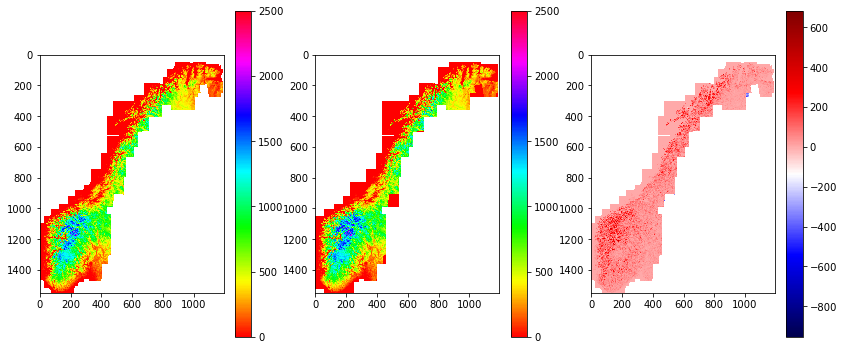

In [28]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)#, sharex=True, sharey=True)
#plt_thredds = ax1.imshow(np.flipud(thredds_altitude[:]), cmap=plt.cm.hsv,vmin=0, vmax=2500)
plt_meandem = ax1.imshow(meandtm[:], cmap=plt.cm.hsv,vmin=0, vmax=2500)
plt.colorbar(ax=ax1, mappable=plt_meandem)

plt_alpdem = ax2.imshow(alpdtm[:], cmap=plt.cm.hsv,vmin=0, vmax=2500)
plt.colorbar(ax=ax2, mappable=plt_alpdem)

plt_diffdem = ax3.imshow(alpdtm[:]-meandtm[:], cmap=plt.cm.seismic)
plt.colorbar(ax=ax3, mappable=plt_diffdem)

#cbar_dir.set_ticks([-180, -135, -90, -45, 0, 45, 90, 135, 180])
#cbar_dir.set_ticklabels(['S', 'SV', 'V', 'NV', 'N', 'NØ', 'Ø', 'SØ', 'S'])
#plt.title(ts)
plt.show()

In [ ]:
# Load region mask
vr = netCDF4.Dataset(r"../data/terrain_parameters/VarslingsOmr_2017.nc", "r")

regions = vr.variables["VarslingsOmr_2017"][:]

ID = 3014 # Lofoten & Vesterålen
#ID = 3029 # Indre Sogn
region_mask = np.where(regions==ID)
# get the lower left and upper right corner of a rectangle around the region
y_min, y_max, x_min, x_max = min(region_mask[0].flatten()), max(region_mask[0].flatten()), min(region_mask[1].flatten()), max(region_mask[1].flatten())

In [2]:
plt.imshow(z)
plt.colorbar(label="M.A.S.L.")

NameError: name 'z' is not defined

In [ ]:
hist, bin_edges = np.histogram(z, bins=[0, 300, 600, 900, 1200, 3000])
hist_perc = hist / (z.shape[1]*z.shape[0] )*100.0

In [ ]:
plt.bar(bin_edges[:-1], hist_perc, width=300, color='lightgrey')

We can calculate area above tree-line by combining elevations with a treeline mask.

## Extract from region

In [2]:
from netCDF4 import Dataset

In [3]:
fr = Dataset(r"../data/terrain_parameters/VarslingsOmr_2017.nc", "r")
print(fr)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.0
    Source_Software: Esri ArcGIS
    dimensions(sizes): x(1195), y(1550)
    variables(dimensions): float64 x(x), float64 y(y), int32 VarslingsOmr_2017(y,x), int32 transverse_mercator()
    groups: 



In [4]:
regions = fr.variables["VarslingsOmr_2017"][:]

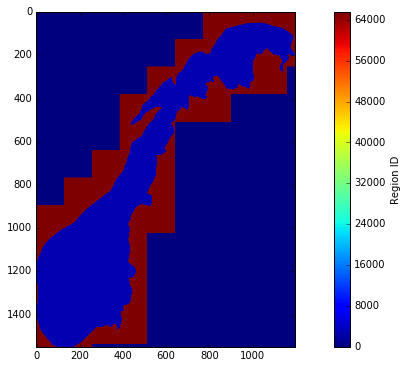

In [5]:
plt.imshow(regions)
plt.colorbar(label="Region ID")

In [6]:
stroms_mask = np.where(regions==3012)
print(stroms_mask)
# get the lower left and upper right corner of a rectangle around the region
y_min, y_max, x_min, x_max = min(stroms_mask[0].flatten()), max(stroms_mask[0].flatten()), min(stroms_mask[1].flatten()), max(stroms_mask[1].flatten())

(array([264, 265, 265, ..., 399, 399, 400], dtype=int64), array([678, 677, 678, ..., 642, 643, 641], dtype=int64))


In [7]:
region_3012 = regions.copy()
region_3012[y_min:y_max, x_min:x_max] = 32000 # rectangle around the region
region_3012[stroms_mask] = 48000 # exact pixels within the region

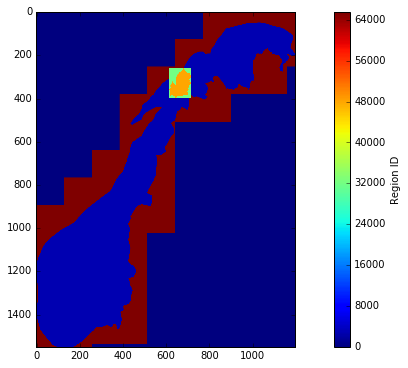

In [8]:
plt.imshow(region_3012)
plt.colorbar(label="Region ID")

In [ ]:
rr_data = Dataset("../data/met_obs_grid/rr_2016_12_12.nc")
rr = rr_data.variables["precipitation_amount"][:, y_min:y_max, x_min:x_max].squeeze()
#rr = rr_data.variables["precipitation_amount"][:, stroms_mask[0], stroms_mask[1]].squeeze() #crashes the script

In [ ]:
print(np.shape(rr))
plt.imshow(rr)
plt.colorbar(label="Precipitation - Sør Troms")